# 2 - Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project

In [ ]:
!pip install pysastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import Libraries

import numpy as np
import pandas as pd

# Exploratory dataset

import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Text Preprocessing

import re
from nltk.tokenize import word_tokenize
import nltk.stem as stemmer
from nltk.stem.porter import *

# Metrics and Validation

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Embedding Layer

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, TextVectorization, GlobalAveragePooling1D, Input, LSTM, GRU, Dropout, Dense

from urllib import request
from PIL import Image

import gensim
from gensim.models import Word2Vec

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
# Download Stopwords and Punkt

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 3 - data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [ ]:
#load_data

data = pd.read_csv('/content/Meeting room.csv')

In [ ]:
# Melihat data awal
data.head(10)

,Title,Website,Phone Number,Category,Reviews,Rating,Longitude,Latitude,Facility Wifi,Facility Projector,...,Facility Whiteboard,Facility AV Equipment,Facility Stationeries,Harga,Kapasitas,Size Room,Address,Kabupaten,Review,Image
0,Ambhara Meeting Room,https://ambharahotel.com/meetings/,212700888,Meeting room,5,4.4,106.803342,-6.243314,Yes,Yes,...,No,Yes,Yes,200000,20,Medium,Jl. Iskandarsyah II. RT.5/RW.2. Melawai. Kec. ...,Jakarta Selatan,Karena letak strategis didepan terminal blok d...,https://ambharahotel.com/wp-content/uploads/20...
1,Regus - Jakarta. The Vida,http://regus.com,2129778000,Office space rental agency,8,4.5,106.759558,-6.191211,Yes,Yes,...,No,No,Yes,190000,50,Medium,Jl. Raya Pejuangan No. 8 The Vida 7th floor. R...,Jakarta Barat,"Ruangan bersih, nyaman serta pelayananya ramah...","https://assets.iwgplc.com/image/upload/c_fill,..."
2,Wellspaces Kemang Coworking Space & Serviced O...,http://wellspaces.co,81318391205,Coworking space,345,4.6,106.813491,-6.254505,No,Yes,...,No,No,No,150000,15,Small,Jl. Bangka XII No.4. RT.2/RW.7. Pela Mampang. ...,Jakarta Selatan,"Tempatnya asik, ke sini karena ada event ngump...",https://dfbok4z7i5u6t.cloudfront.net/thumbnail...
3,US Coworking Space - PIK Avenue,http://betterwithus.id,8111085505,Coworking space,7496,4.3,106.740378,-6.109718,Yes,No,...,No,No,No,95000,12,Small,PIK Avenue. Level 6. Jl. Pantai Indah Kapuk. R...,Jakarta Utara,Tempatnya sepi enak buat kerja wifinya juga ke...,https://s3-ap-southeast-1.amazonaws.com/xwork-...
4,MARQUEE - Equity Tower,http://marqueeoffices.com,2175999999,Office space rental agency,198,4.4,106.808661,-6.226844,Yes,Yes,...,Yes,No,Yes,250000,20,Medium,Equity Tower Building 35-37th floor. Jl. Jend....,Jakarta Selatan,"Nice looking, bersih aman sudah pasti, yg lu...",https://marqueeoffices.com/images/service/meet...
5,GoWork Plaza Indonesia - Coworking and Office ...,http://go-work.com,2129922823,Coworking space,170,4.8,106.821877,-6.192589,Yes,Yes,...,Yes,No,No,130000,7,Small,Plaza Indonesia. Level 5 Unit E021AB. Jl. M.H....,Jakarta Pusat,"ruang meeting yang didesain menarik, perencana...",https://ofiskita.com///laravel-filemanager/pho...
6,Apiary Coworking Space (Puri),http://apiary.id,2130497711,Event venue,162,4.6,106.738512,-6.188509,Yes,Yes,...,Yes,No,No,150000,12,Small,Lippo St. Moritz Office Tower (Floor 9. Unit 9...,Jakarta Barat,"fasilitanya cukup lengkap ada wifi , proyektor...",https://s3-ap-southeast-1.amazonaws.com/xwork-...
7,MULA by Galeria Jakarta,http://mulaindonesia.com,8111123423,Coworking space,505,4.7,106.799757,-6.291122,Yes,Yes,...,No,No,No,70000,5,Small,Jl. T.B. Simatupang Kav. 17. Cilandak Barat. R...,Jakarta Selatan,"bagi yg perlu bisnis, rapat dlsb dgn ruang rap...",https://mulaindonesia.com/wp-content/uploads/2...
8,GoWork Pacific Place - Coworking and Office Space,http://go-work.com,215152000,Coworking space,224,4.7,106.809910,-6.224618,Yes,Yes,...,Yes,No,No,130000,20,Medium,Pacific Place Mall. Level 1. Jl. Jenderal Sudi...,Jakarta Selatan,tempatnya sangat cozy untuk mengadakan meeting...,https://go-work.com/assets/images/meeting-room...
9,GoWork Setiabudi,http://go-work.com,2129264178,Coworking space,147,4.6,106.830060,-6.216292,Yes,Yes,...,Yes,No,No,130000,20,Medium,Setiabudi 2 Building. Ground. Jl. H. R. Rasuna...,Jakarta Selatan,"Bersih, nyaman, dan tenang. Udah gitu sekelili...",https://blog.go-work.com/wp-content/uploads/20...


In [ ]:
# Melihat data akhir
data.tail(3)

,Title,Website,Phone Number,Category,Reviews,Rating,Longitude,Latitude,Facility Wifi,Facility Projector,...,Facility Whiteboard,Facility AV Equipment,Facility Stationeries,Harga,Kapasitas,Size Room,Address,Kabupaten,Review,Image
61,iOffice - Jakarta (Virtual Office | Serviced O...,http://ioffice.co.id/,81212341673,Office space rental agency,3,5.0,106.885666,-6.192791,Yes,Yes,...,Yes,No,No,120000,20,Medium,"Jl. Pemuda No.15, RT.8/RW.4, Rawamangun, Kec. ...",Jakarta Timur,"Tempatnya strategis, dan nyaman, harga worth it.",http://ioffice.co.id/wp-content/uploads/2021/0...
62,Vin & Co.Working,https://vincoworking.id/,81386468028,Meeting room,32,4.9,106.882750,-6.226598,Yes,Yes,...,No,No,No,100000,16,Small,Jl. Raya Cipinang Besar Selatan No. 8 - Gedung...,Jakarta Timur,"Lokasi sangat strategis, dan mudah dijangkau, ...",https://vincoworking.id/assets/images/gallery/...
63,Reneospace,https://www.instagram.com/reneospace/,2122088851,Coworking space,157,4.8,106.899056,-6.241558,Yes,No,...,Yes,No,No,100000,10,Small,"Jl. Pondok Bambu Batas Bambu No.14, RT.3/RW.12...",Jakarta Timur,"Tempatnya nyaman, Cocok untuk yang ingin menye...",https://www.rukita.co/stories/wp-content/uploa...


In [ ]:
# data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  64 non-null     object 
 1   Website                64 non-null     object 
 2   Phone Number           64 non-null     int64  
 3   Category               64 non-null     object 
 4   Reviews                64 non-null     int64  
 5   Rating                 64 non-null     float64
 6   Longitude              64 non-null     float64
 7   Latitude               64 non-null     float64
 8   Facility Wifi          64 non-null     object 
 9   Facility Projector     64 non-null     object 
 10  Facility Food & Drink  64 non-null     object 
 11  Facility Whiteboard    64 non-null     object 
 12  Facility AV Equipment  64 non-null     object 
 13  Facility Stationeries  64 non-null     object 
 14  Harga                  64 non-null     int64  
 15  Kapasita

# 4 - Exploratory data Analysis (EDA)
> Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, word cloud, dan lain sebagainya.

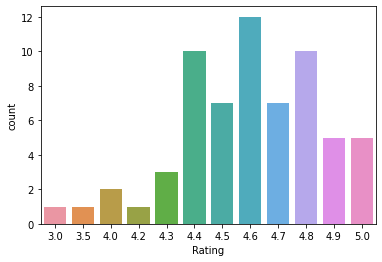

In [ ]:
# Histogram of Rating
sns.countplot(x="Rating", data=data)

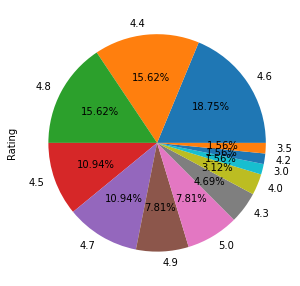

In [ ]:
# Pie Chart of Rating

data['Rating'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

In [ ]:
#Rating Distribution
data['Rating'].value_counts()

4.6    12
4.4    10
4.8    10
4.5     7
4.7     7
4.9     5
5.0     5
4.3     3
4.0     2
3.0     1
4.2     1
3.5     1
Name: Rating, dtype: int64

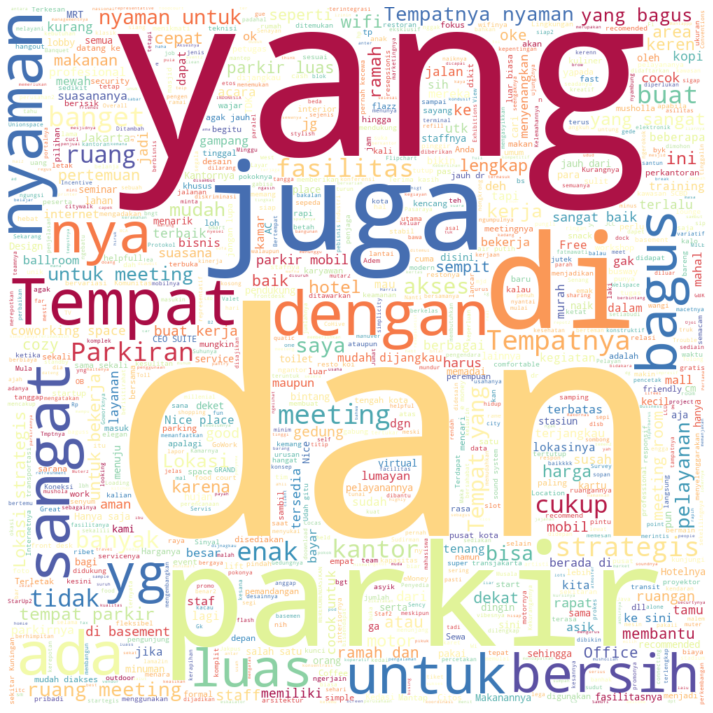

In [ ]:
# Wordcloud for Positive Review

corpus = " ".join(data['Review'])
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(corpus)

#== 
wc = WordCloud(background_color='white', mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
wc.generate(corpus)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

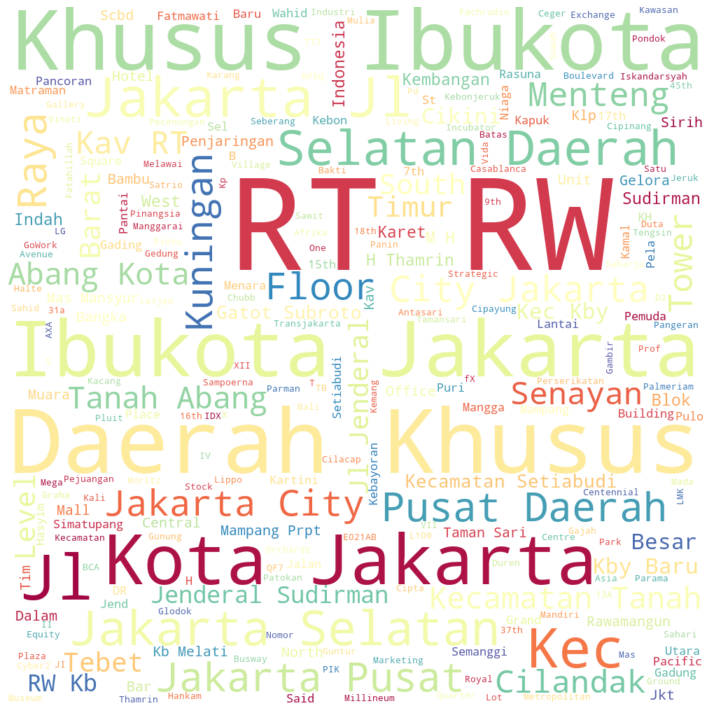

In [ ]:
corpus = " ".join(data['Address'])
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(corpus)

#== 
wc = WordCloud(background_color='white', mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
wc.generate(corpus)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

# 5 - data Preprocessing
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-val-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Preprocessing All Documents

In [ ]:
def clean_text(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"    
        u"\U0001F300-\U0001F5FF"    
        u"\U0001F680-\U0001F6FF"   
        u"\U0001F1E0-\U0001F1FF"    
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"                   
        u"\u3030"
                      "]+", re.UNICODE)

    text = text.lower()                                                                                 # membuat huruf menjadi kecil
    text = re.sub(emoj, '', text)                                                                       # remove emoji
    text = re.sub(r'(.)\1{2,}', r'\1', text)                                                            # mengubah huruf berulang diatas 2 kali menjadi 1 saja
    text = re.sub("[0-9]", " ", text)                                                                   # remove numbers
    text = re.sub("(Diterjemahkan oleh Google)", " ", text)                                                                   
    text = re.sub("'s", " ", text) 
    text = re.sub("[¹²³¹⁰ⁱ⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾ⁿ]", "", text)                                                     # remove power character
    text = re.sub("[^A-Za-z\s']"," ", text)  
    text = re.sub("[^\w\s]*[_,.!?#&;:><+-/)/(\'\"]", " ", text)                                         # remove bukan string dan whitespace
    text = ' '.join([re.sub(r'nya$|ny$', '', i) for i in text.split()])                                 # menghapus akhir kata 'nya' atau 'ny'
    text = re.sub(" +", " ", text.strip())                                                              # Remove unnecessary white space
    return text

def cleaned(data):
    data['Review_preprocessed'] = data['Review'].apply(clean_text)
    return data

In [ ]:
cleaned(data)
data.tail()

,Title,Website,Phone Number,Category,Reviews,Rating,Longitude,Latitude,Facility Wifi,Facility Projector,...,Facility AV Equipment,Facility Stationeries,Harga,Kapasitas,Size Room,Address,Kabupaten,Review,Image,Review_preprocessed
59,Kecapi Meeting Room Santika Hotel TMII,https://www.mysantika.com/,2129378500,Hotel,9,4.7,106.886695,-6.302934,Yes,Yes,...,Yes,Yes,500000,60,Large,"Jl. Hankam Raya No.46, RT.1/RW.2, Ceger, Kec. ...",Jakarta Timur,Ruang meeting lumayan besar Dan AC nya dingin ...,https://ik.imagekit.io/tvlk/blog/2020/03/Hotel...,ruang meeting lumayan besar dan ac dingin bang...
60,Balairung Meeting Room,http://balairung-hotel.co.id/,2185917217,Hotel,7,4.4,106.854881,-6.199693,Yes,Yes,...,Yes,Yes,400000,100,Large,"Jl. Matraman Raya No.19, RT.1/RW.1, Palmeriam,...",Jakarta Timur,"Di depan gedung ini terdapat halte busway, tem...",https://ak-d.tripcdn.com/images/0224u120009vaz...,di depan gedung ini terdapat halte busway temp...
61,iOffice - Jakarta (Virtual Office | Serviced O...,http://ioffice.co.id/,81212341673,Office space rental agency,3,5.0,106.885666,-6.192791,Yes,Yes,...,No,No,120000,20,Medium,"Jl. Pemuda No.15, RT.8/RW.4, Rawamangun, Kec. ...",Jakarta Timur,"Tempatnya strategis, dan nyaman, harga worth it.",http://ioffice.co.id/wp-content/uploads/2021/0...,tempat strategis dan nyaman harga worth it
62,Vin & Co.Working,https://vincoworking.id/,81386468028,Meeting room,32,4.9,106.882750,-6.226598,Yes,Yes,...,No,No,100000,16,Small,Jl. Raya Cipinang Besar Selatan No. 8 - Gedung...,Jakarta Timur,"Lokasi sangat strategis, dan mudah dijangkau, ...",https://vincoworking.id/assets/images/gallery/...,lokasi sangat strategis dan mudah dijangkau te...
63,Reneospace,https://www.instagram.com/reneospace/,2122088851,Coworking space,157,4.8,106.899056,-6.241558,Yes,No,...,No,No,100000,10,Small,"Jl. Pondok Bambu Batas Bambu No.14, RT.3/RW.12...",Jakarta Timur,"Tempatnya nyaman, Cocok untuk yang ingin menye...",https://www.rukita.co/stories/wp-content/uploa...,tempat nyaman cocok untuk yang ingin menyewa k...


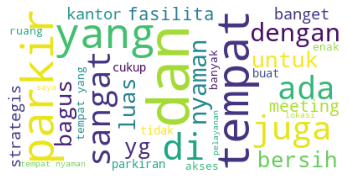

In [ ]:
corpus = " ".join(data['Review_preprocessed'])
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(corpus)
img = word_cloud.to_image()

fig = plt.figure(1)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# mmebuat Function 
def stemmer_stopped(text):
    stemmer_factory = StemmerFactory()
    stemmer = stemmer_factory.create_stemmer()
    text = stemmer.stem(text)

    list_stopwords = set(stopwords.words('indonesian'))                             
    stopword_factory = StopWordRemoverFactory()                                     
    stopwords_sastrawi = set(stopword_factory.get_stop_words()) 
    list_stopwords = list_stopwords.union(stopwords_sastrawi)                       

    text = " ".join(w if w not in list_stopwords else '' for w in text.split())
    text = re.sub(" +", " ", text.strip())                                          
    return text

def clean_stopword(data):
    data['clean stopword'] = data['Review_preprocessed'].apply(stemmer_stopped)
    return data

In [ ]:
list_stopwords = set(stopwords.words('indonesian'))                             
stopword_factory = StopWordRemoverFactory()                                     
stopwords_sastrawi = set(stopword_factory.get_stop_words()) 
list_stopwords = list_stopwords.union(stopwords_sastrawi)

In [ ]:
list_stopwords

{'a',
 'ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'arti',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'b',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagainamakah',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasannya',
 'bahwasanya',
 'baik',
 'baiklah',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'bera

In [ ]:
clean_stopword(data)
data.head()

,Title,Website,Phone Number,Category,Reviews,Rating,Longitude,Latitude,Facility Wifi,Facility Projector,...,Facility Stationeries,Harga,Kapasitas,Size Room,Address,Kabupaten,Review,Image,Review_preprocessed,clean stopword
0,Ambhara Meeting Room,https://ambharahotel.com/meetings/,212700888,Meeting room,5,4.4,106.803342,-6.243314,Yes,Yes,...,Yes,200000,20,Medium,Jl. Iskandarsyah II. RT.5/RW.2. Melawai. Kec. ...,Jakarta Selatan,Karena letak strategis didepan terminal blok d...,https://ambharahotel.com/wp-content/uploads/20...,karena letak strategis didepan terminal blok d...,letak strategis terminal blok pusat belanja pa...
1,Regus - Jakarta. The Vida,http://regus.com,2129778000,Office space rental agency,8,4.5,106.759558,-6.191211,Yes,Yes,...,Yes,190000,50,Medium,Jl. Raya Pejuangan No. 8 The Vida 7th floor. R...,Jakarta Barat,"Ruangan bersih, nyaman serta pelayananya ramah...","https://assets.iwgplc.com/image/upload/c_fill,...",ruangan bersih nyaman serta pelayana ramah gre...,ruang bersih nyaman pelayana ramah great offic...
2,Wellspaces Kemang Coworking Space & Serviced O...,http://wellspaces.co,81318391205,Coworking space,345,4.6,106.813491,-6.254505,No,Yes,...,No,150000,15,Small,Jl. Bangka XII No.4. RT.2/RW.7. Pela Mampang. ...,Jakarta Selatan,"Tempatnya asik, ke sini karena ada event ngump...",https://dfbok4z7i5u6t.cloudfront.net/thumbnail...,tempat asik ke sini karena ada event ngumpul p...,asik event ngumpul start up biar sharing welsp...
3,US Coworking Space - PIK Avenue,http://betterwithus.id,8111085505,Coworking space,7496,4.3,106.740378,-6.109718,Yes,No,...,No,95000,12,Small,PIK Avenue. Level 6. Jl. Pantai Indah Kapuk. R...,Jakarta Utara,Tempatnya sepi enak buat kerja wifinya juga ke...,https://s3-ap-southeast-1.amazonaws.com/xwork-...,tempat sepi enak buat kerja wifi juga kencang ...,sepi wifi kencang ukur kantor doownload cepat ...
4,MARQUEE - Equity Tower,http://marqueeoffices.com,2175999999,Office space rental agency,198,4.4,106.808661,-6.226844,Yes,Yes,...,Yes,250000,20,Medium,Equity Tower Building 35-37th floor. Jl. Jend....,Jakarta Selatan,"Nice looking, bersih aman sudah pasti, yg lu...",https://marqueeoffices.com/images/service/meet...,nice looking bersih aman sudah pasti yg luar b...,nice looking bersih aman yg akses lift gak rib...


In [ ]:
data.to_csv('df_new1.csv', index= False)

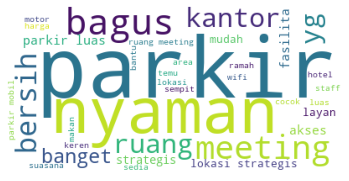

In [ ]:
corpus = " ".join(data['clean stopword'])
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(corpus)
img = word_cloud.to_image()

fig = plt.figure(1)
plt.imshow(img)
plt.axis('off')
plt.show()

# MODELING

Pada bagian ini kita akan melakukan modeling text word2vec, saya akan melakukan perbandingan antara text preprocessed dan clean stopword

In [ ]:
# Display text preproceseed
data['Review_preprocessed'][0]

'karena letak strategis didepan terminal blok dan pusat belanja pasaraya ruangan nyaman snack juga enak pelayan dan teknisi cukup sigap melayani tamu bagus'

In [ ]:
text_reviews = data.Review_preprocessed.apply(gensim.utils.simple_preprocess)
text_reviews

0     [karena, letak, strategis, didepan, terminal, ...
1     [ruangan, bersih, nyaman, serta, pelayana, ram...
2     [tempat, asik, ke, sini, karena, ada, event, n...
3     [tempat, sepi, enak, buat, kerja, wifi, juga, ...
4     [nice, looking, bersih, aman, sudah, pasti, yg...
                            ...                        
59    [ruang, meeting, lumayan, besar, dan, ac, ding...
60    [di, depan, gedung, ini, terdapat, halte, busw...
61    [tempat, strategis, dan, nyaman, harga, worth,...
62    [lokasi, sangat, strategis, dan, mudah, dijang...
63    [tempat, nyaman, cocok, untuk, yang, ingin, me...
Name: Review_preprocessed, Length: 64, dtype: object

Selanjutnya kita akan membuat variable yang sama untuk clean stopword

In [ ]:
text_reviews_stopped = data['clean stopword'].apply(gensim.utils.simple_preprocess)
text_reviews_stopped

0     [letak, strategis, terminal, blok, pusat, bela...
1     [ruang, bersih, nyaman, pelayana, ramah, great...
2     [asik, event, ngumpul, start, up, biar, sharin...
3     [sepi, wifi, kencang, ukur, kantor, doownload,...
4     [nice, looking, bersih, aman, yg, akses, lift,...
                            ...                        
59    [ruang, meeting, lumayan, ac, dingin, banget, ...
60                     [gedung, halte, busway, meeting]
61                [strategis, nyaman, harga, worth, it]
62    [lokasi, strategis, mudah, jangkau, nyaman, ak...
63    [nyaman, cocok, sewa, kantor, meeting, jakarta...
Name: clean stopword, Length: 64, dtype: object

## Model 1 (Kolom Text Preprocessed)

In [ ]:
# Model 1
model = Word2Vec(
    window=10,
    min_count=5,
    alpha=0.11,
    seed=10
)

In [ ]:
model.build_vocab(text_reviews, progress_per=1000)

In [ ]:
model.train(text_reviews, total_examples=model.corpus_count, epochs=model.epochs)

(6354, 20535)

In [ ]:
# melihat kata yang mirip dengan input nyaman
model.wv.most_similar("nyaman")

[('yg', 0.9997870922088623),
 ('buat', 0.9997535943984985),
 ('kerja', 0.9997473955154419),
 ('bersih', 0.9997377991676331),
 ('cocok', 0.9997342824935913),
 ('ruangan', 0.9997243881225586),
 ('dan', 0.9997231960296631),
 ('bagus', 0.9997210502624512),
 ('untuk', 0.9997151494026184),
 ('interior', 0.9997141361236572)]

In [ ]:
# melihat kata yang mirip dengan input bersih
model.wv.most_similar("bersih")

[('yg', 0.9997418522834778),
 ('nyaman', 0.9997377395629883),
 ('ruangan', 0.9997340440750122),
 ('wifi', 0.9997084140777588),
 ('banget', 0.9997025728225708),
 ('jg', 0.9997014999389648),
 ('kota', 0.9996992945671082),
 ('cocok', 0.9996905326843262),
 ('bagus', 0.9996882081031799),
 ('kerja', 0.9996829628944397)]

In [ ]:
# Melihat nilai kemiripan antara 2 kata 
model.wv.similarity(w1="luas", w2="nyaman")

0.9993585

## Model 2 (Kolom Clean Stopword)

In [ ]:
# Model 2
model_2 = Word2Vec(
    window=2,
    min_count=0,
    alpha=0.15,
    seed=10
)

In [ ]:
model_2.build_vocab(text_reviews_stopped, progress_per=1000)

In [ ]:
model_2.train(text_reviews_stopped, total_examples=model_2.corpus_count, epochs=model_2.epochs)

(8647, 12345)

In [ ]:
# Melihat kemiripan kata dengan input nyaman
model_2.wv.most_similar("nyaman")

[('kantor', 0.9998284578323364),
 ('area', 0.9998222589492798),
 ('meeting', 0.9998195171356201),
 ('yg', 0.9998098015785217),
 ('bagus', 0.9998055696487427),
 ('bersih', 0.9998049736022949),
 ('keren', 0.9998036026954651),
 ('jalan', 0.9998003840446472),
 ('aman', 0.9997949004173279),
 ('ruang', 0.9997883439064026)]

In [ ]:
# Melihat kemiripan kata dengan input bersih
model_2.wv.most_similar("bersih")

[('nyaman', 0.9998049736022949),
 ('meeting', 0.9998016357421875),
 ('keren', 0.9997871518135071),
 ('aman', 0.9997711181640625),
 ('harga', 0.9997623562812805),
 ('yg', 0.9997580051422119),
 ('jalan', 0.9997573494911194),
 ('makan', 0.9997555017471313),
 ('area', 0.999751627445221),
 ('wifi', 0.9997495412826538)]

In [ ]:
model_2.wv.most_similar("parkir")

[('jalan', 0.9997750520706177),
 ('area', 0.999764084815979),
 ('mobil', 0.9997639656066895),
 ('luas', 0.9997495412826538),
 ('yg', 0.9997372627258301),
 ('motor', 0.9997336864471436),
 ('nyaman', 0.9997214078903198),
 ('susah', 0.9997138977050781),
 ('bantu', 0.9997124671936035),
 ('bayar', 0.9997091293334961)]

In [ ]:
# Function Uji Coba
def testing_similar(text):
  res_1 = model.most_similar(text)
  res_2 = model_2.most_similar(text)
  print('Hasil Model 1 :',res_1)
  print('Hasil Model 2 :',res_2)

In [ ]:
testing_similar("meeting")

Hasil Model 1 : [('bagus', 0.9997662305831909), ('banget', 0.9997578859329224), ('cocok', 0.9997421503067017), ('jg', 0.9997138977050781), ('juga', 0.9997043609619141), ('suasana', 0.9997023344039917), ('internet', 0.9997022151947021), ('acara', 0.9996923208236694), ('yg', 0.9996877908706665), ('oke', 0.9996845126152039)]
Hasil Model 2 : [('ruang', 0.999848484992981), ('keren', 0.999830961227417), ('banget', 0.9998307824134827), ('makan', 0.9998213052749634), ('nyaman', 0.9998195171356201), ('staff', 0.9998190402984619), ('cozy', 0.9998093247413635), ('kantor', 0.999803900718689), ('bersih', 0.9998016357421875), ('area', 0.9998005032539368)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.


In [ ]:
testing_similar("luas")

Hasil Model 1 : [('hotel', 0.9997531175613403), ('cukup', 0.9996849894523621), ('parkiran', 0.9996604323387146), ('jika', 0.9996516704559326), ('tidak', 0.9996458888053894), ('di', 0.9996365904808044), ('saja', 0.9996222257614136), ('yg', 0.999609649181366), ('mobil', 0.9996053576469421), ('ha', 0.9995957612991333)]
Hasil Model 2 : [('bayar', 0.9997777342796326), ('area', 0.9997626543045044), ('bagus', 0.9997583627700806), ('nyaman', 0.9997560977935791), ('yg', 0.999751091003418), ('parkir', 0.9997496604919434), ('susah', 0.999739408493042), ('mobil', 0.9997254014015198), ('kota', 0.999714195728302), ('kantor', 0.999712347984314)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.


# Model simulation

In [ ]:
# Let's See The Contents of Vector of Token `Tokopedia`

model_2['nyaman']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


array([ 0.00264268, -0.3360042 , -0.00388216, -0.13423741, -0.08512262,
        0.10911994, -0.11729055,  0.06001175,  0.00090342, -0.03943385,
       -0.12428125,  0.3734121 ,  0.02379952,  0.5383941 , -0.01903811,
       -0.06030173, -0.12935463, -0.3923654 ,  0.04096518, -0.07494002,
        0.03154065,  0.34905344,  0.1157388 , -0.1162252 ,  0.12139641,
        0.4263166 , -0.12025099,  0.17833109,  0.19541839,  0.44179696,
        0.05750481,  0.379467  ,  0.14275433,  0.1096148 , -0.8198309 ,
        0.02376955, -0.2558868 ,  0.44773483,  0.41254458, -0.04529097,
       -0.11741757, -0.22792388, -0.09710167,  0.4567221 ,  0.02302521,
        0.29115945, -0.11392295,  0.12906906,  0.27957013,  0.01851936,
        0.01171665, -0.3652902 , -0.03899994,  0.157088  , -0.06800838,
       -0.05691921,  0.1047219 , -0.40883523,  0.01465316, -0.02106893,
        0.0521428 , -0.14449413,  0.20356792, -0.24606447,  0.00853777,
       -0.5457139 ,  0.23616543,  0.36734825,  0.27030215, -0.33

In [ ]:
model_2.save("model_2fix.model")

In [ ]:
model_2.save("model_2fix.h5")

In [ ]:
# Get Top 5 Similar Token of `presiden`

model.similar_by_word("parkir", topn=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('mobil', 0.9995532035827637),
 ('motor', 0.9995284080505371),
 ('parkiran', 0.9994736909866333),
 ('basement', 0.9993928074836731),
 ('ke', 0.9993783235549927)]

In [ ]:
model_2 = Word2Vec.load('model_2fix.model')
def input_text(text1, text2, text3):
  list_new =[]
  columns_new= []
  count_word_1 = []
  count_word_2 = []
  count_word_3 = []
  count_word_4 = []
  count_word_5 = []
  count_word_6 = []
  count_word_7 = []
  count_word_8 = []
  count_word_9 = []
  count_word_10 = []
  count_word_11 = []
  count_word_12 = []
  count_word_13 = []
  count_word_14 = []
  count_word_15 = []

  try:
    # Jika bisa semuanya
    res_1 = model_2.wv.most_similar(text1)   
    res_2 = model_2.wv.most_similar(text2)
    res_3 = model_2.wv.most_similar(text3)
    df_res_1 = pd.DataFrame(res_1)
    df_res_2 = pd.DataFrame(res_2)
    df_res_3 = pd.DataFrame(res_3)
    df_result_1 = pd.concat([df_res_1, df_res_2, df_res_3], axis=0).reset_index(drop=True)
    for item in df_result_1[0].unique():
      list_new.append(item)
    for i in range(len(data)):
      count_word_1.append(data['clean stopword'][i].count(list_new[0]))
      count_word_2.append(data['clean stopword'][i].count(list_new[1]))
      count_word_3.append(data['clean stopword'][i].count(list_new[2]))
      count_word_4.append(data['clean stopword'][i].count(list_new[3]))
      count_word_5.append(data['clean stopword'][i].count(list_new[4]))
      count_word_6.append(data['clean stopword'][i].count(list_new[5]))
      count_word_7.append(data['clean stopword'][i].count(list_new[6]))
      count_word_8.append(data['clean stopword'][i].count(list_new[7]))
      count_word_9.append(data['clean stopword'][i].count(list_new[8]))
      count_word_10.append(data['clean stopword'][i].count(list_new[9]))
      count_word_11.append(data['clean stopword'][i].count(list_new[10]))
      count_word_12.append(data['clean stopword'][i].count(list_new[11]))
      count_word_13.append(data['clean stopword'][i].count(list_new[12]))
      count_word_14.append(data['clean stopword'][i].count(list_new[13]))
      count_word_15.append(data['clean stopword'][i].count(list_new[14]))
    data['count_word_1'] = count_word_1
    data['count_word_2'] = count_word_2
    data['count_word_3'] = count_word_3
    data['count_word_4'] = count_word_4
    data['count_word_5'] = count_word_5
    data['count_word_6'] = count_word_6
    data['count_word_7'] = count_word_7
    data['count_word_8'] = count_word_8
    data['count_word_9'] = count_word_9
    data['count_word_10'] = count_word_10
    data['count_word_11'] = count_word_11
    data['count_word_12'] = count_word_12
    data['count_word_13'] = count_word_13
    data['count_word_14'] = count_word_14
    data['count_word_15'] = count_word_15
    data['sum_count_word'] = data.iloc[:, :].sum(axis=1)
    data_1 = data[data['sum_count_word'] != 0]
    data_1 = data_1.sort_values("sum_count_word", ascending=False)[['Title', 'Website', 'Phone Number', 'Rating', 'Harga', 'Kapasitas', 'Size Room', 'Address', 'Kabupaten', 'sum_count_word']]
    return data_1

  except:
    try:
      # Hanya 2 dan 3
      res_2 = model_2.wv.most_similar(text2)
      res_3 = model_2.wv.most_similar(text3)
      df_res_2 = pd.DataFrame(res_2)
      df_res_3 = pd.DataFrame(res_3)
      df_result_2 = pd.concat([df_res_2, df_res_3], axis=0).reset_index(drop=True)
      for item in df_result_2[0].unique():
        list_new.append(item)
      for i in range(len(data)):
        count_word_1.append(data['clean stopword'][i].count(list_new[0]))
        count_word_2.append(data['clean stopword'][i].count(list_new[1]))
        count_word_3.append(data['clean stopword'][i].count(list_new[2]))
        count_word_4.append(data['clean stopword'][i].count(list_new[3]))
        count_word_5.append(data['clean stopword'][i].count(list_new[4]))
        count_word_6.append(data['clean stopword'][i].count(list_new[5]))
        count_word_7.append(data['clean stopword'][i].count(list_new[6]))
        count_word_8.append(data['clean stopword'][i].count(list_new[7]))
        count_word_9.append(data['clean stopword'][i].count(list_new[8]))
        count_word_10.append(data['clean stopword'][i].count(list_new[9]))
      data['count_word_1'] = count_word_1
      data['count_word_2'] = count_word_2
      data['count_word_3'] = count_word_3
      data['count_word_4'] = count_word_4
      data['count_word_5'] = count_word_5
      data['count_word_6'] = count_word_6
      data['count_word_7'] = count_word_7
      data['count_word_8'] = count_word_8
      data['count_word_9'] = count_word_9
      data['count_word_10'] = count_word_10
      data['sum_count_word'] = data.iloc[:,:].sum(axis=1)
      data_2 = data[data['sum_count_word'] != 0]
      data_2 = data_2.sort_values("sum_count_word", ascending=False)[['Title', 'Website', 'Phone Number', 'Rating', 'Harga', 'Kapasitas', 'Size Room', 'Address', 'Kabupaten', 'sum_count_word']]
      return data_2

    except:
      try:
        # Hanya 3 
        res_3 = model_2.wv.most_similar(text3)
        df_result_3 = pd.DataFrame(res_3).reset_index(drop=True)
        for item in df_result_3[0].unique():
          list_new.append(item)
        for i in range(len(data)):
          count_word_1.append(data['clean stopword'][i].count(list_new[0]))
          count_word_2.append(data['clean stopword'][i].count(list_new[1]))
          count_word_3.append(data['clean stopword'][i].count(list_new[2]))
          count_word_4.append(data['clean stopword'][i].count(list_new[3]))
          count_word_5.append(data['clean stopword'][i].count(list_new[4]))
        data['count_word_1'] = count_word_1
        data['count_word_2'] = count_word_2
        data['count_word_3'] = count_word_3
        data['count_word_4'] = count_word_4
        data['count_word_5'] = count_word_5
        data['sum_count_word'] = data.iloc[:,:].sum(axis=1)
        data_3 = data[data['sum_count_word'] != 0]
        data_3 = data_3.sort_values("sum_count_word", ascending=False)[['Title', 'Website', 'Phone Number', 'Rating', 'Harga', 'Kapasitas', 'Size Room', 'Address', 'Kabupaten', 'sum_count_word']]
        return data_3

      except :
        try:
          # Hanya 1 dan 2
          res_1 = model_2.wv.most_similar(text1)
          res_2 = model_2.wv.most_similar(text2)
          df_res_1 = pd.DataFrame(res_1)
          df_res_2 = pd.DataFrame(res_2)
          df_result_4 = pd.concat([df_res_1, df_res_2], axis=0).reset_index(drop=True)
          for item in df_result_4[0].unique():
            list_new.append(item)
          for i in range(len(data)):
            count_word_1.append(data['clean stopword'][i].count(list_new[0]))
            count_word_2.append(data['clean stopword'][i].count(list_new[1]))
            count_word_3.append(data['clean stopword'][i].count(list_new[2]))
            count_word_4.append(data['clean stopword'][i].count(list_new[3]))
            count_word_5.append(data['clean stopword'][i].count(list_new[4]))
            count_word_6.append(data['clean stopword'][i].count(list_new[5]))
            count_word_7.append(data['clean stopword'][i].count(list_new[6]))
            count_word_8.append(data['clean stopword'][i].count(list_new[7]))
            count_word_9.append(data['clean stopword'][i].count(list_new[8]))
            count_word_10.append(data['clean stopword'][i].count(list_new[9]))
          data['count_word_1'] = count_word_1
          data['count_word_2'] = count_word_2
          data['count_word_3'] = count_word_3
          data['count_word_4'] = count_word_4
          data['count_word_5'] = count_word_5
          data['count_word_6'] = count_word_6
          data['count_word_7'] = count_word_7
          data['count_word_8'] = count_word_8
          data['count_word_9'] = count_word_9
          data['count_word_10'] = count_word_10
          data['sum_count_word'] = data.iloc[:,:].sum(axis=1)
          data_4 = data[data['sum_count_word'] != 0]
          data_4 = data_4.sort_values("sum_count_word", ascending=False)[['Title', 'Website', 'Phone Number', 'Rating', 'Harga', 'Kapasitas', 'Size Room', 'Address', 'Kabupaten', 'sum_count_word']]
          return data_4

        except:
          try:
            # Hanya res 2 
            res_2 = model_2.wv.most_similar(text2)
            df_res_2 = pd.DataFrame(res_2)
            df_result_5 = df_res_2.reset_index(drop=True)
            for item in df_result_5[0].unique():
              list_new.append(item)
            for i in range(len(data)):
              count_word_1.append(data['clean stopword'][i].count(list_new[0]))
              count_word_2.append(data['clean stopword'][i].count(list_new[1]))
              count_word_3.append(data['clean stopword'][i].count(list_new[2]))
              count_word_4.append(data['clean stopword'][i].count(list_new[3]))
              count_word_5.append(data['clean stopword'][i].count(list_new[4]))
            data['count_word_1'] = count_word_1
            data['count_word_2'] = count_word_2
            data['count_word_3'] = count_word_3
            data['count_word_4'] = count_word_4
            data['count_word_5'] = count_word_5
            data['sum_count_word'] = data.iloc[:,:].sum(axis=1)
            data_5 = data[data['sum_count_word'] != 0]
            data_5 = data_5.sort_values("sum_count_word", ascending=False)[['Title', 'Website', 'Phone Number', 'Rating', 'Harga', 'Kapasitas', 'Size Room', 'Address', 'Kabupaten', 'sum_count_word']]
            return data_5

          except:
            try:
              # Hanya res 1
              res_1 = model_2.wv.most_similar(text1)
              df_res_1 = pd.DataFrame(res_1)
              df_result_6 = df_res_1.reset_index(drop=True)
              for item in df_result_6[0].unique():
                list_new.append(item)
              for i in range(len(data)):
                count_word_1.append(data['clean stopword'][i].count(list_new[0]))
                count_word_2.append(data['clean stopword'][i].count(list_new[1]))
                count_word_3.append(data['clean stopword'][i].count(list_new[2]))
                count_word_4.append(data['clean stopword'][i].count(list_new[3]))
                count_word_5.append(data['clean stopword'][i].count(list_new[4]))
              data['count_word_1'] = count_word_1
              data['count_word_2'] = count_word_2
              data['count_word_3'] = count_word_3
              data['count_word_4'] = count_word_4
              data['count_word_5'] = count_word_5
              data['sum_count_word'] = data.iloc[:,:].sum(axis=1)
              data_6 = data[data['sum_count_word'] != 0]
              data_6 = data_6.sort_values("sum_count_word", ascending=False)[['Title', 'Website', 'Phone Number', 'Rating', 'Harga', 'Kapasitas', 'Size Room', 'Address', 'Kabupaten', 'sum_count_word']]
              return data_6

            except:
              print("Maaf Keyword Tidak ditemukan")

In [ ]:
hasil_1 = input_text("nyaman", "parkir", "luas")
hasil_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,Title,Website,Phone Number,Rating,Harga,Kapasitas,Size Room,Address,Kabupaten,sum_count_word
51,Working Zone,http://workingzone.id,88211614789,4.8,85000,6,Small,Nomor 42.A. Jl. Bangka Raya. Pela Mampang. Kec...,Jakarta Selatan,8.821170e+10
39,Virtual Office. Meeting Room. Event Space & Se...,http://deskby.com,85770003700,4.8,240000,4,Small,IDX Incubator. Menara Mandiri I. 16th Floor. J...,Jakarta Selatan,8.577024e+10
28,SQuare One (SQ) Function Hall & Meeting Rooms,https://squareonefunctionhall.com/,82122131088,4.8,500000,15,Small,South Quarter. Jl. R.A. Kartini No.Kav. 8. RT....,Jakarta Selatan,8.212263e+10
32,KEDASI @ The Cause Event Space & Auditorium,http://kedasi.co.id,81902330677,4.5,120000,20,Medium,Graha Niaga Thamrin Level 6. Kebon Kacang. Jl....,Jakarta Pusat,8.190245e+10
11,Le Aman Workspace,http://desty.page,81388141410,4.9,375000,15,Medium,Duta Mas Fatmawati Blok D2. 9 -10. Jl. Fatmawa...,Jakarta Selatan,8.138852e+10
...,...,...,...,...,...,...,...,...,...,...
19,CEO SUITE Indonesia Stock Exchange,http://ceosuite.com,215157777,5.0,200000,30,Medium,Jl. Jend. Sudirman Kav 52-53. 17th Floor Indon...,Jakarta Selatan,2.153579e+08
8,GoWork Pacific Place - Coworking and Office Space,http://go-work.com,215152000,4.7,130000,20,Medium,Pacific Place Mall. Level 1. Jl. Jenderal Sudi...,Jakarta Selatan,2.152824e+08
18,Redtop Hotel & Convention Center,http://redtophotel.com,213500077,4.4,1200000,60,Large,Jl. Pecenongan No.72. RT.2/RW.4. Kb. Klp.. Kec...,Jakarta Pusat,2.147050e+08
26,Paragon Meeting & Conference Room,https://paragon.co.id,213917070,4.3,370000,60,Large,Jl. KH Wahid Hasyim No.31a. RT.18/RW.6. Kb. Si...,Jakarta Pusat,2.142873e+08
